# Penguin Dataset Analysis
## Assignment #2
**Course:** Data Science Fundamentals  
**MID Term Project:** ***Data Analysis & Visualization with Python of US 130 Hospitals Diabetic Dataset***  
***Submitted by:***  
Muhammzad Hamza (FA23-BSE-111)  
Muhammzad Sami (FA23-BSE-132)  
Syed Muhammad Dawood Bukhari (FA23-BSE-178)  
**Instructor:** Sir Usamn Shehzaib  
**Date:** October 20,2025

---

In [ ]:
#importing libraries for datapreprocessing and visualizations 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from scipy.stats import zscore


# loading dataset from csv
df = pd.read_csv(r"E:\Semester 5\DS-Lab\Mid-Project\final\dsf\diabetic_data.csv")


#  DATA PREPROCESSING AND VISUALIZATION

## 1 Data Preprocessing

### 1.1 Viewing first 15 recors of dataframe

In [64]:
#viewing first records of data frame
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### 1.2 Viewing shape of dataframe

In [65]:
# shape of dataframe
df.shape

(101766, 50)

### 1.3 Viewing summary statistics of dataframe

In [66]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### 1.4 Checking for `missing values` in the dataset

In [67]:
df.isnull().sum().sort_values(ascending=False)

max_glu_serum               96420
A1Cresult                   84748
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
encounter_id                    0
patient_nbr                     0
number_inpatient                0
number_emergency                0
diag_1                          0
diag_2                          0
number_diagnoses                0
diag_3                          0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### 1.4 Viewing all missing Values in the Dataframe

In [ ]:
print("="*80)
print("COMPREHENSIVE MISSING VALUE ANALYSIS")
print("="*80)

# Define all possible missing value indicators
missing_indicators = ['?', 'Unknown', 'Invalid', 'None', 'Not Available', '', ' ', 'NA', 'N/A']

print(f"\n Dataset shape: {df.shape}")
print(f"Total cells: {df.shape[0] * df.shape[1]:,}")

# Function to count all types of missing values
def count_all_missing(series):
    """Count NaN, ?, and other missing indicators"""
    # Standard NaN
    nan_count = series.isna().sum()
    
    # String-based missing values
    string_missing = 0
    if series.dtype == 'object':
        for indicator in missing_indicators:
            string_missing += (series == indicator).sum()
    
    return nan_count + string_missing

# Calculate comprehensive missing values
missing_comprehensive = pd.DataFrame({
    'Column': df.columns,
    'Standard_NaN': [df[col].isna().sum() for col in df.columns],
    'Question_Mark': [(df[col] == '?').sum() if df[col].dtype == 'object' else 0 for col in df.columns],
    
})

missing_comprehensive['Total_Missing'] = (
    missing_comprehensive['Standard_NaN'] + 
    missing_comprehensive['Question_Mark'] 
)

missing_comprehensive['Missing_Percentage'] = (
    missing_comprehensive['Total_Missing'] / len(df) * 100
).round(2)

# Sort by total missing
missing_comprehensive = missing_comprehensive.sort_values('Total_Missing', ascending=False)

print("\n" + "="*80)
print("COMPLETE MISSING VALUE BREAKDOWN (Top 20)")
print("="*80)
print(missing_comprehensive.head(20).to_string(index=False))

# Show columns with '?' symbols
print("\n" + "="*80)
print("COLUMNS WITH '?' SYMBOLS")
print("="*80)
has_question = missing_comprehensive[missing_comprehensive['Question_Mark'] > 0]
if len(has_question) > 0:
    print(f"\n{len(has_question)} columns contain '?' symbols:")
    print(has_question[['Column', 'Question_Mark', 'Missing_Percentage']].to_string(index=False))
else:
    print("\nNo columns with '?' symbols found.")

# Show example values from columns with missing data
print("\n" + "="*80)
print("SAMPLE VALUES FROM HIGH-MISSING COLUMNS")
print("="*80)
for idx, row in missing_comprehensive.head(5).iterrows():
    col = row['Column']
    print(f"\n📌 {col} (Missing: {row['Missing_Percentage']}%)")
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Sample: {df[col].value_counts().head(5).to_dict()}")

# Summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
total_missing = missing_comprehensive['Total_Missing'].sum()
total_cells = df.shape[0] * df.shape[1]
print(f"\nTotal missing values (all types): {total_missing:,}")
print(f"Percentage of dataset: {total_missing/total_cells*100:.2f}%")
print(f"\nColumns with >50% missing: {(missing_comprehensive['Missing_Percentage'] > 50).sum()}")
print(f"Columns with >90% missing: {(missing_comprehensive['Missing_Percentage'] > 90).sum()}")
print(f"Columns with '?' symbols: {(missing_comprehensive['Question_Mark'] > 0).sum()}")

COMPREHENSIVE MISSING VALUE ANALYSIS

📊 Dataset shape: (101766, 50)
Total cells: 5,088,300

COMPLETE MISSING VALUE BREAKDOWN (Top 20)
                  Column  Standard_NaN  Question_Mark  Total_Missing  Missing_Percentage
                  weight             0          98569          98569               96.86
           max_glu_serum         96420              0          96420               94.75
               A1Cresult         84748              0          84748               83.28
       medical_specialty             0          49949          49949               49.08
              payer_code             0          40256          40256               39.56
                    race             0           2273           2273                2.23
                  diag_3             0           1423           1423                1.40
                  diag_2             0            358            358                0.35
                  diag_1             0             21            

### 1.5 Droping highly missing values columns and non-necessary columns 

In [69]:
df.drop(["encounter_id","patient_nbr","weight","payer_code"],axis=1,inplace=True)
df.columns.tolist()

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

### 1.6 Viewing columns in the dataframe

In [70]:
# columns in the dataframe
print(df.columns.tolist())

['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


> # Hoping that medical speciality might be some strong related we will decide after Chi square test

In [71]:

# df.drop(['weight', 'payer_code', 'encounter_id', 'patient_nbr', 'medical_specialty'], axis=1, inplace=True)
# df.shape


## 2 Handling missing values

### 2.1 Handling missing values in diagnosis columns `diag 1` , `diag 2` , `diag 3`

In [72]:
# Step 1: Replace '?' with NaN (taake missing values treat ho saken)
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].replace('?', np.nan)

# Step 2: Fill missing values with mode of that column
for col in ['diag_1', 'diag_2', 'diag_3']:
    mode_value = df[col].mode()[0]   # sabse frequent value
    df[col] = df[col].fillna(mode_value)
    print(f"{col} column filled with mode: {mode_value}")

diag_1 column filled with mode: 428
diag_2 column filled with mode: 276
diag_3 column filled with mode: 250


### 2.2 imputing missing values in max_glu_serum

In [73]:
#imputing missing values in 'max_glu_serum' column with 'not_tested' 


df['max_glu_serum'] = df['max_glu_serum'].replace(np.nan, 'not_tested')
print(f" no of missing in {df[['max_glu_serum']].isnull().sum()}")


 no of missing in max_glu_serum    0
dtype: int64


In [74]:
df['max_glu_serum'].unique()

array(['not_tested', '>300', 'Norm', '>200'], dtype=object)

### 2.3 Imputing missing values in race column

In [ ]:
#proportional imputation for 'race' column
# Step 1: Replace '?' with NaN for consistency
df['race'] = df['race'].replace('?', np.nan)

# Step 2: Calculate proportions (excluding NaN)
proportions = df['race'].value_counts(normalize=True)

# Step 3: Find how many values are missing
n_missing = df['race'].isna().sum()
print(f"Missing values in 'race': {n_missing}")

# Step 4: Create a random sample based on proportions
imputed_values = np.random.choice(
    proportions.index,           # unique race categories
    size=n_missing,              # number of missing values
    p=proportions.values         # their probabilities
)

# Step 5: Fill missing values with sampled values
df.loc[df['race'].isna(), 'race'] = imputed_values

#  Now all missing values are filled proportionally
print("Proportional mode imputation done for 'race' column.")
print(df['race'].value_counts())

# race_counts = df['race'].value_counts(dropna=False)

# print("Unique values in 'race' column with their counts:")
# print(race_counts)


Missing values in 'race': 2273
Proportional mode imputation done for 'race' column.
race
Caucasian          77843
AfricanAmerican    19643
Hispanic            2080
Other               1541
Asian                659
Name: count, dtype: int64


### 2.4 imputing missing  in A1Cresults

In [76]:
df["A1Cresult"].fillna("not tested", inplace=True)
df["A1Cresult"].unique()

C:\Users\DCOMPUTER\AppData\Local\Temp\ipykernel_2036\2181931278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["A1Cresult"].fillna("not tested", inplace=True)


array(['not tested', '>7', '>8', 'Norm'], dtype=object)

### 2.5 imputing missing values in medical speciality


In [77]:
df['medical_specialty'] = df['medical_specialty'].replace('?', 'not_known')
print(f" no of missing in {df[['medical_specialty']].isnull().sum()}")

 no of missing in medical_specialty    0
dtype: int64


### 2.6 Verifying that there is no missing values in the dataframe

In [ ]:
print("="*80)
print("COMPREHENSIVE MISSING VALUE ANALYSIS")
print("="*80)

# Define all possible missing value indicators
missing_indicators = ['?', 'Unknown', 'Invalid', 'None', 'Not Available', '', ' ', 'NA', 'N/A']

print(f"\nDataset shape: {df.shape}")
print(f"Total cells: {df.shape[0] * df.shape[1]:,}")

# Function to count all types of missing values
def count_all_missing(series):
    """Count NaN, ?, and other missing indicators"""
    # Standard NaN
    nan_count = series.isna().sum()
    
    # String-based missing values
    string_missing = 0
    if series.dtype == 'object':
        for indicator in missing_indicators:
            string_missing += (series == indicator).sum()
    
    return nan_count + string_missing

# Calculate comprehensive missing values
missing_comprehensive = pd.DataFrame({
    'Column': df.columns,
    'Standard_NaN': [df[col].isna().sum() for col in df.columns],
    'Question_Mark': [(df[col] == '?').sum() if df[col].dtype == 'object' else 0 for col in df.columns],
    
})

missing_comprehensive['Total_Missing'] = (
    missing_comprehensive['Standard_NaN'] + 
    missing_comprehensive['Question_Mark'] 
)

missing_comprehensive['Missing_Percentage'] = (
    missing_comprehensive['Total_Missing'] / len(df) * 100
).round(2)

# Sort by total missing
missing_comprehensive = missing_comprehensive.sort_values('Total_Missing', ascending=False)

print("\n" + "="*80)
print("COMPLETE MISSING VALUE BREAKDOWN (Top 20)")
print("="*80)
print(missing_comprehensive.head(20).to_string(index=False))

# Show columns with '?' symbols
print("\n" + "="*80)
print("COLUMNS WITH '?' SYMBOLS")
print("="*80)
has_question = missing_comprehensive[missing_comprehensive['Question_Mark'] > 0]
if len(has_question) > 0:
    print(f"\n{len(has_question)} columns contain '?' symbols:")
    print(has_question[['Column', 'Question_Mark', 'Missing_Percentage']].to_string(index=False))
else:
    print("\nNo columns with '?' symbols found.")

# Show example values from columns with missing data
print("\n" + "="*80)
print("SAMPLE VALUES FROM HIGH-MISSING COLUMNS")
print("="*80)
for idx, row in missing_comprehensive.head(5).iterrows():
    col = row['Column']
    print(f"\n📌 {col} (Missing: {row['Missing_Percentage']}%)")
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Sample: {df[col].value_counts().head(5).to_dict()}")

# Summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
total_missing = missing_comprehensive['Total_Missing'].sum()
total_cells = df.shape[0] * df.shape[1]
print(f"\nTotal missing values (all types): {total_missing:,}")
print(f"Percentage of dataset: {total_missing/total_cells*100:.2f}%")
print(f"\nColumns with >50% missing: {(missing_comprehensive['Missing_Percentage'] > 50).sum()}")
print(f"Columns with >90% missing: {(missing_comprehensive['Missing_Percentage'] > 90).sum()}")
print(f"Columns with '?' symbols: {(missing_comprehensive['Question_Mark'] > 0).sum()}")
print("\n" + "="*80)
print("Imputation is done")
print("="*80)

COMPREHENSIVE MISSING VALUE ANALYSIS

📊 Dataset shape: (101766, 46)
Total cells: 4,681,236

COMPLETE MISSING VALUE BREAKDOWN (Top 20)
                  Column  Standard_NaN  Question_Mark  Total_Missing  Missing_Percentage
                    race             0              0              0                 0.0
                  gender             0              0              0                 0.0
                     age             0              0              0                 0.0
       admission_type_id             0              0              0                 0.0
discharge_disposition_id             0              0              0                 0.0
     admission_source_id             0              0              0                 0.0
        time_in_hospital             0              0              0                 0.0
       medical_specialty             0              0              0                 0.0
      num_lab_procedures             0              0            

## 3. Handling outliers

### 3.1 Viewing  numerical columns

In [79]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)


Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')


📊 Outlier Summary (Before Dropping):
                      Column  Outlier_Count  Total_Rows  Outlier_%
1   discharge_disposition_id           7301      101766       7.17
2        admission_source_id           6956      101766       6.84
0          admission_type_id           5632      101766       5.53
5             num_procedures           4954      101766       4.87
3           time_in_hospital           3700      101766       3.64
9           number_inpatient           3638      101766       3.57
7          number_outpatient           2556      101766       2.51
6            num_medications           2270      101766       2.23
8           number_emergency           1664      101766       1.64
10          number_diagnoses           1320      101766       1.30
4         num_lab_procedures            318      101766       0.31


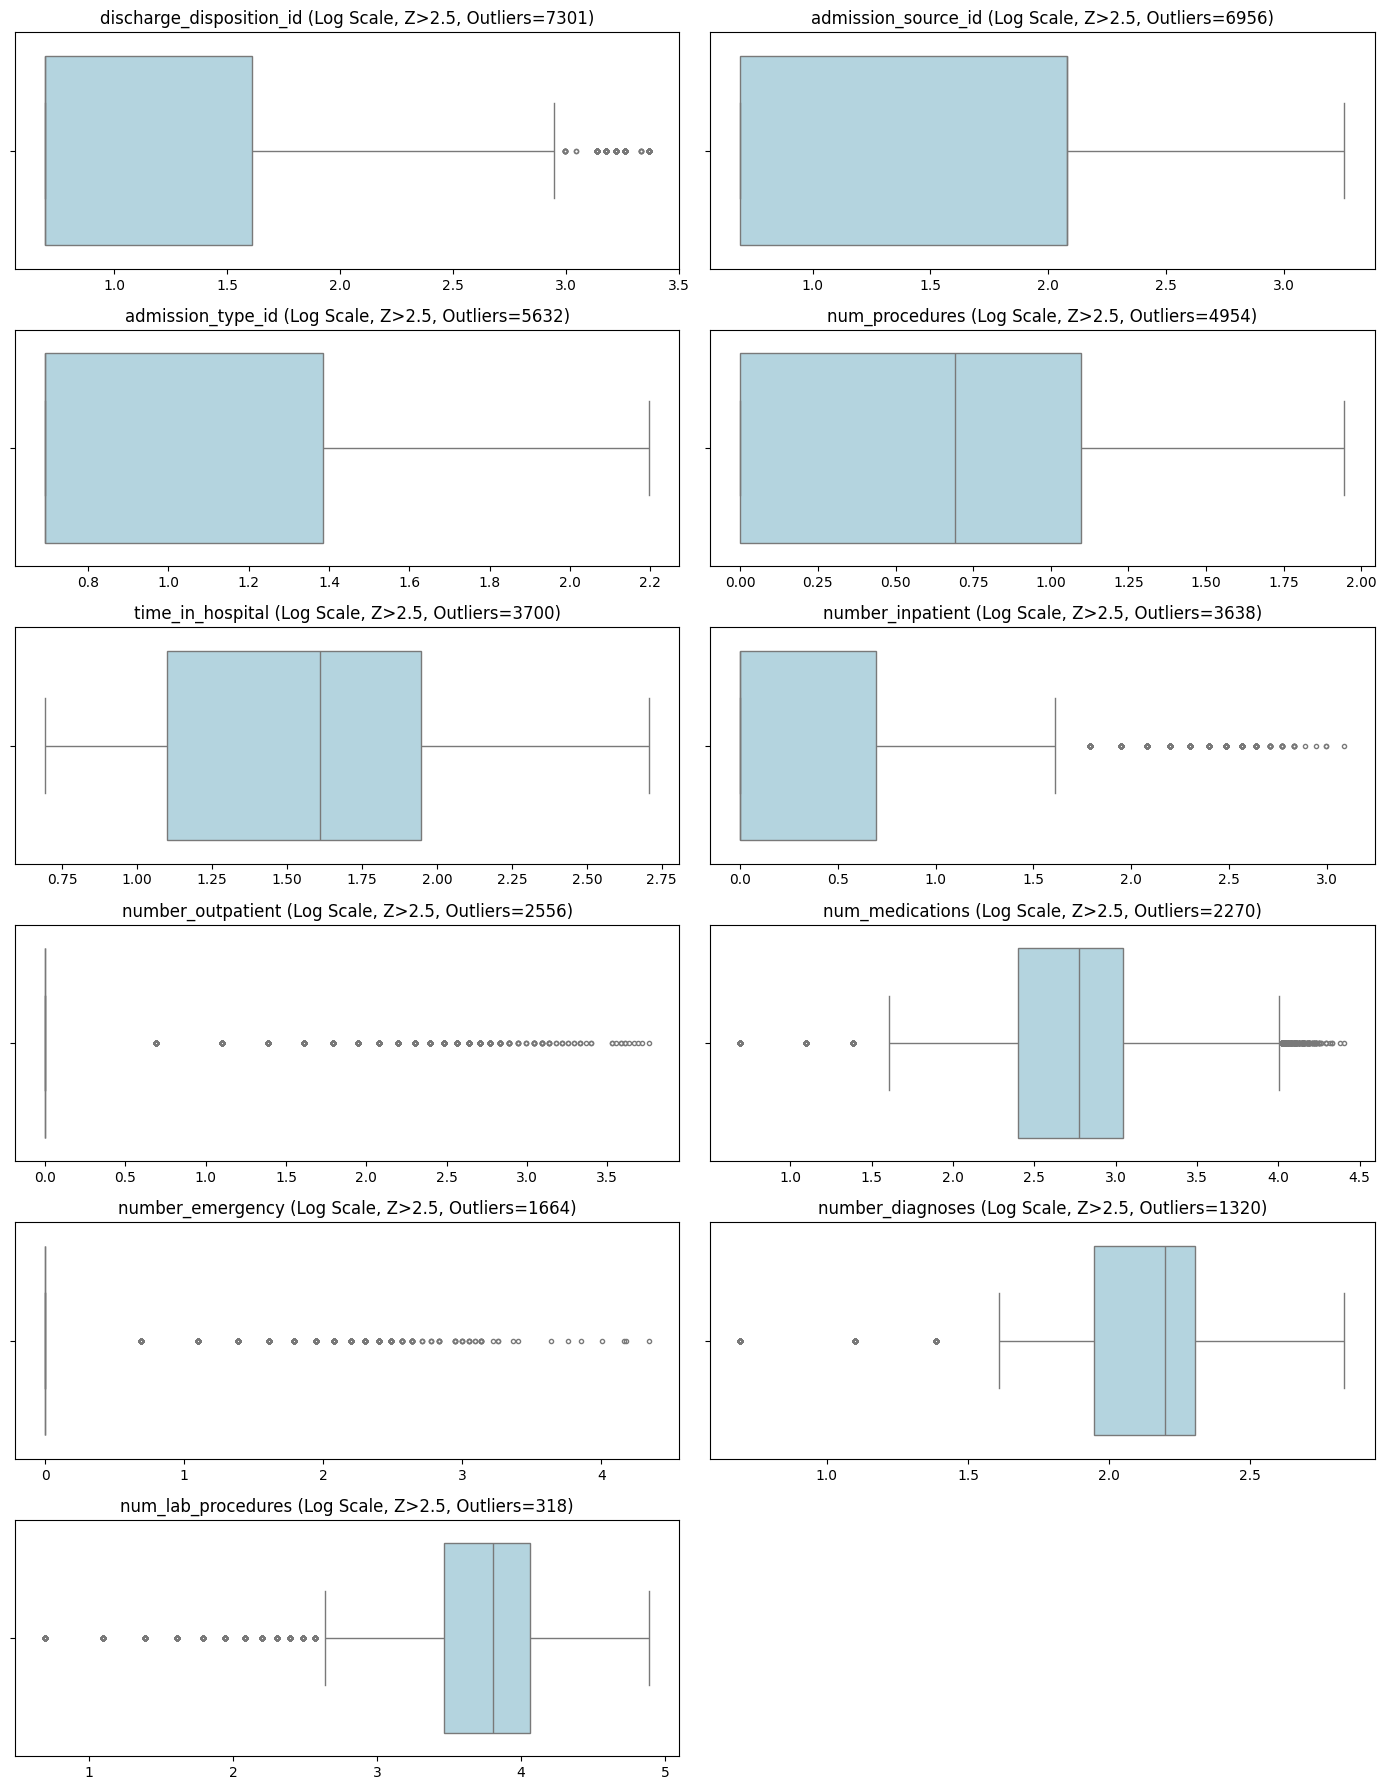

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

# Define numeric columns
numeric_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                'num_medications', 'number_outpatient', 'number_emergency',
                'number_inpatient', 'number_diagnoses']

# Z-score computation
threshold = 2.5
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outliers = (z_scores > threshold)
outlier_counts = np.sum(outliers, axis=0)

# Outlier summary
outlier_summary = pd.DataFrame({
    'Column': numeric_cols,
    'Outlier_Count': outlier_counts,
    'Total_Rows': len(df),
    'Outlier_%': (outlier_counts / len(df) * 100).round(2)
}).sort_values(by='Outlier_Count', ascending=False)

print(" Outlier Summary (Before Dropping):")
print(outlier_summary)

# Visualization
plt.figure(figsize=(14, 18))
for i, col in enumerate(outlier_summary['Column'], 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x=np.log1p(df[col]), color='lightblue', fliersize=3)
    plt.title(f'{col} (Log Scale, Z>{threshold}, Outliers={int(outlier_counts[numeric_cols.index(col)])})')
    plt.xlabel('')
plt.tight_layout()
plt.show()


### 3.2 Viewing boxplots of numerical columns to identify outliers

In [ ]:
# Choose threshold
threshold = 2.5

# Calculate Z-scores only for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

# Identify which values are outliers
outliers = (z_scores > threshold)

# Count outliers per column
outlier_counts = np.sum(outliers, axis=0)

# Convert to DataFrame for better readability
outlier_summary = pd.DataFrame({
    'Column': numeric_cols,
    'Outlier_Count': outlier_counts,
    'Total_Rows': len(df),
    'Outlier_%': (outlier_counts / len(df) * 100).round(2)
})

# Sort columns with most outliers first
outlier_summary = outlier_summary.sort_values(by='Outlier_Count', ascending=False)

print(" Outlier Summary (Before Dropping):")
print(outlier_summary)
# Remove rows with any outliers
df = df[(z_scores < threshold).all(axis=1)]
print("After removing outliers:", df.shape)




📊 Outlier Summary (Before Dropping):
                      Column  Outlier_Count  Total_Rows  Outlier_%
1   discharge_disposition_id           7301      101766       7.17
2        admission_source_id           6956      101766       6.84
0          admission_type_id           5632      101766       5.53
5             num_procedures           4954      101766       4.87
3           time_in_hospital           3700      101766       3.64
9           number_inpatient           3638      101766       3.57
7          number_outpatient           2556      101766       2.51
6            num_medications           2270      101766       2.23
8           number_emergency           1664      101766       1.64
10          number_diagnoses           1320      101766       1.30
4         num_lab_procedures            318      101766       0.31
✅ After removing outliers: (71457, 46)



📊 Correlation of Features with Target (readmitted):

number_inpatient            0.193153
number_diagnoses            0.121471
number_emergency            0.094395
number_outpatient           0.088364
num_medications             0.070417
time_in_hospital            0.056730
admission_source_id         0.046403
num_lab_procedures          0.029132
admission_type_id          -0.021837
discharge_disposition_id   -0.026476
num_procedures             -0.040381

✅ Features to KEEP (|corr| >= 0.1):
['number_inpatient', 'number_diagnoses']

⚠️ Features to DROP (|corr| < 0.1):
['number_emergency', 'number_outpatient', 'num_medications', 'time_in_hospital', 'admission_source_id', 'num_lab_procedures', 'admission_type_id', 'discharge_disposition_id', 'num_procedures']


C:\Users\DCOMPUTER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


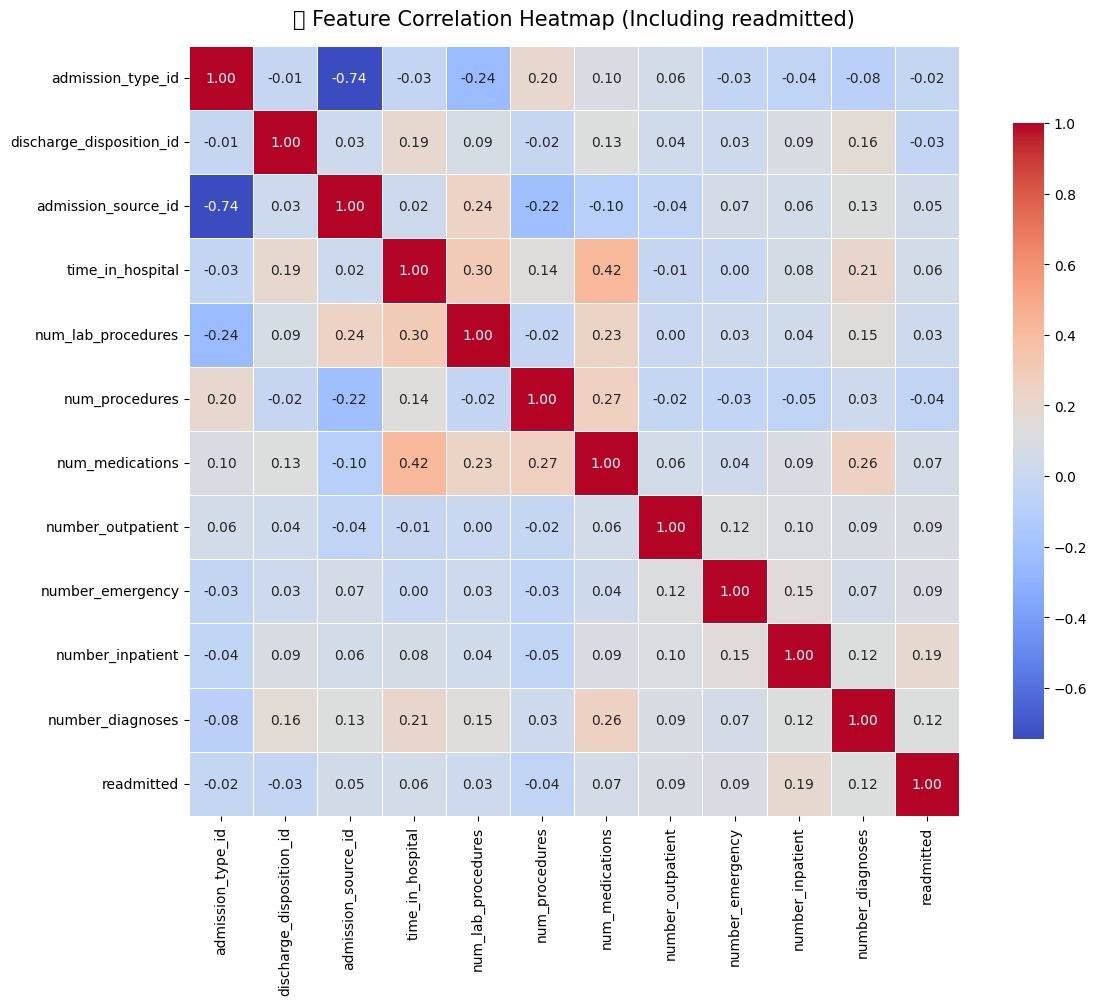


🔼 Top 10 Features Positively Correlated with readmitted:
number_inpatient            0.193153
number_diagnoses            0.121471
number_emergency            0.094395
number_outpatient           0.088364
num_medications             0.070417
time_in_hospital            0.056730
admission_source_id         0.046403
num_lab_procedures          0.029132
admission_type_id          -0.021837
discharge_disposition_id   -0.026476
Name: readmitted, dtype: float64

🔽 Top 10 Features Negatively Correlated with readmitted:
number_diagnoses            0.121471
number_emergency            0.094395
number_outpatient           0.088364
num_medications             0.070417
time_in_hospital            0.056730
admission_source_id         0.046403
num_lab_procedures          0.029132
admission_type_id          -0.021837
discharge_disposition_id   -0.026476
num_procedures             -0.040381
Name: readmitted, dtype: float64

Dataset Shape: (71457, 46)
[1 0]


In [ ]:
# Map readmitted to binary (admitted again or not)
df['readmitted'] = df['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})

# Compute correlation matrix (numeric only)
corr = df.corr(numeric_only=True)

# ---  Step 1: Correlation with Target ---
target_corr = corr['readmitted'].drop('readmitted').sort_values(ascending=False)

# Display top correlated features
print("\n Correlation of Features with Target (readmitted):\n")
print(target_corr.to_string())

# ---  Step 2: Suggest Features Based on Threshold ---
threshold = 0.1  # Adjust as needed
strong_features = target_corr[abs(target_corr) >= threshold]
weak_features = target_corr[abs(target_corr) < threshold]

print("\n Features to KEEP (|corr| >= 0.1):")
print(strong_features.index.tolist())

print("\n Features to DROP (|corr| < 0.1):")
print(weak_features.index.tolist())

# ---  Step 3: Correlation Heatmap ---
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title(" Feature Correlation Heatmap (Including readmitted)", fontsize=15, pad=15)
plt.show()

# ---  Step 4: Highlight Top Positive & Negative Correlations ---
top_pos = target_corr.head(10)
top_neg = target_corr.tail(10)

print("\n Top 10 Features Positively Correlated with readmitted:")
print(top_pos)

print("\n Top 10 Features Negatively Correlated with readmitted:")
print(top_neg)

print("\nDataset Shape:", df.shape)
print (df['readmitted'].unique())


In [ ]:
from scipy.stats import f_oneway

# Ensure readmitted is numeric (0/1)
# Group data by age bins
age_groups = df.groupby('age')['readmitted'].apply(list)

# Perform one-way ANOVA
f_stat, p_val = f_oneway(*age_groups)

print(" ANOVA Test for Age vs Readmitted")
print("===================================")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_val:.6f}")
print("\nSignificant:" , " Yes" if p_val < 0.05 else "❌ No")


📊 ANOVA Test for Age vs Readmitted
F-Statistic: 35.1584
P-Value: 0.000000

Significant: ✅ Yes


In [84]:
# Show all columns that are object or category type
df.select_dtypes(include=['object', 'category']).columns.tolist()


['race',
 'gender',
 'age',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [85]:
df['readmitted'].unique()

array([1, 0])

In [ ]:
# --- List of categorical features ---
categorical_cols = [
    'race', 'gender', 'age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
    'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
    'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
    'diabetesMed'
]  # readmitted is target

chi_square_results = []

print(" Chi-Square Test Results for Association with 'readmitted'")
print("=" * 90)

for col in categorical_cols:
    # Handle missing values to avoid errors
    df[col] = df[col].fillna('missing')

    # Build contingency table (cross-tab)
    contingency_table = pd.crosstab(df[col], df['readmitted'])

    # Perform chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Compute Cramér's V (strength of association)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dim))

    chi_square_results.append({
        'Feature': col,
        'Chi2_Statistic': chi2_stat,
        'P_Value': p_val,
        'Cramers_V': cramers_v,
        'Significant': 'Yes' if p_val < 0.05 else 'No'
    })

# Convert results to DataFrame
results_df = pd.DataFrame(chi_square_results).sort_values(by='P_Value')

# --- Display results ---
print(results_df.to_string(index=False))

# --- Show significant features only ---
sig = results_df[results_df['Significant'] == 'Yes']
print("\n" + "=" * 90)
print(f" Significant Features (p < 0.05): {len(sig)} out of {len(categorical_cols)}")
print("\nFeatures likely associated with readmission:")
print(sig['Feature'].tolist())


📊 Chi-Square Test Results for Association with 'readmitted'


C:\Users\DCOMPUTER\AppData\Local\Temp\ipykernel_2036\838127533.py:31: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2_stat / (n * min_dim))
C:\Users\DCOMPUTER\AppData\Local\Temp\ipykernel_2036\838127533.py:31: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2_stat / (n * min_dim))
C:\Users\DCOMPUTER\AppData\Local\Temp\ipykernel_2036\838127533.py:31: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2_stat / (n * min_dim))


                 Feature  Chi2_Statistic       P_Value  Cramers_V Significant
                  diag_1     2567.226772 2.517614e-211   0.189544         Yes
                  diag_2     2190.732845 8.623276e-151   0.175094         Yes
       medical_specialty      813.301928 1.371089e-127   0.106685         Yes
                  diag_3     2080.287365 1.021120e-124   0.170624         Yes
                 insulin      347.383636  5.497831e-75   0.069724         Yes
             diabetesMed      295.034455  3.977646e-66   0.064256         Yes
                     age      315.074496  1.649430e-62   0.066402         Yes
                  change      178.072828  1.277063e-40   0.049920         Yes
                    race       95.596028  8.511153e-20   0.036576         Yes
           max_glu_serum       74.878872  3.846514e-16   0.032371         Yes
               glipizide       46.739964  3.947666e-10   0.025575         Yes
             repaglinide       45.212396  8.339254e-10   0.02515

In [ ]:
# List of all medicine-related columns
medicine_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone', 'change', 'diabetesMed'
]

# Loop through each medicine column and print unique values + their counts
for col in medicine_cols:
    print(f"\n Column: {col}")
    print(df.value_counts(dropna=False))

print(df.shape)
print(df.columns.tolist())


📦 Column: metformin
race             gender           age       admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  medical_specialty         num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult   metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
AfricanAmerican  Female           [0-10)    1                  1                         7                    2                 Pediatrics-Endocrinology  47                  0               7                0                  0                 0                 250.03  787    

In [89]:
# =============================================
#  Step 1: Select important features (based on chi-square and correlation)
# =============================================
selected_features = [
    'diag_1', 'diag_2', 'diag_3', 'medical_specialty',
    'insulin', 'diabetesMed', 'age', 'change', 'race',
    'max_glu_serum', 'glipizide', 'repaglinide', 'A1Cresult',
    'metformin', 'rosiglitazone', 'acarbose', 'gender', 'pioglitazone',
    'number_inpatient', 'number_diagnoses', 'number_emergency',
    'number_outpatient', 'num_medications', 'time_in_hospital'
]

# =============================================
# Step 2: Encode categorical features using LabelEncoder
# =============================================
le = LabelEncoder()

for col in selected_features:
    if df[col].dtype == 'object':        # Encode only categorical columns
        df[col] = le.fit_transform(df[col].astype(str))

# =============================================
#  Step 3: Split data into training and testing sets
# =============================================
X = df[selected_features]
y = df['readmitted']                     # Target variable (0 = No, 1 = Yes)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =============================================
#  Step 4: Train Decision Tree Classifier
# =============================================
model = DecisionTreeClassifier(
    criterion='entropy',    # Can also try 'gini'
    max_depth=10,           # Limit depth to prevent overfitting
    random_state=42
)

model.fit(X_train, y_train)

# =============================================
#  Step 5: Evaluate Model Performance
# =============================================
y_pred = model.predict(X_test)

print("Model Evaluation Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# =============================================
# Step 6: Visualize Simplified Decision Tree (Top 6 Levels)
# =============================================
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=selected_features,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    max_depth=4,       #  Show only first 6 levels
    fontsize=12
)
plt.title("Simplified Decision Tree (Depth = 6)", fontsize=14, weight='bold')
plt.show()

# =============================================
# Step 7: Feature Importance Visualization
# =============================================
importances = model.feature_importances_

# Create DataFrame and sort by importance
imp_df = pd.DataFrame({
    'feature': selected_features,
    'importance': importances
}).sort_values('importance', ascending=False).head(20)

# Plot top 20 features
plt.figure(figsize=(10, 6))
sns.barplot(data=imp_df, x='importance', y='feature', palette='viridis')
plt.title('Top Decision Tree Feature Importances', fontsize=14, weight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


Model Evaluation Results
Accuracy: 0.6107

Confusion Matrix:
 [[5804 2133]
 [3431 2924]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68      7937
           1       0.58      0.46      0.51      6355

    accuracy                           0.61     14292
   macro avg       0.60      0.60      0.59     14292
weighted avg       0.61      0.61      0.60     14292



NameError: name 'plot_tree' is not defined

<Figure size 2000x1000 with 0 Axes>

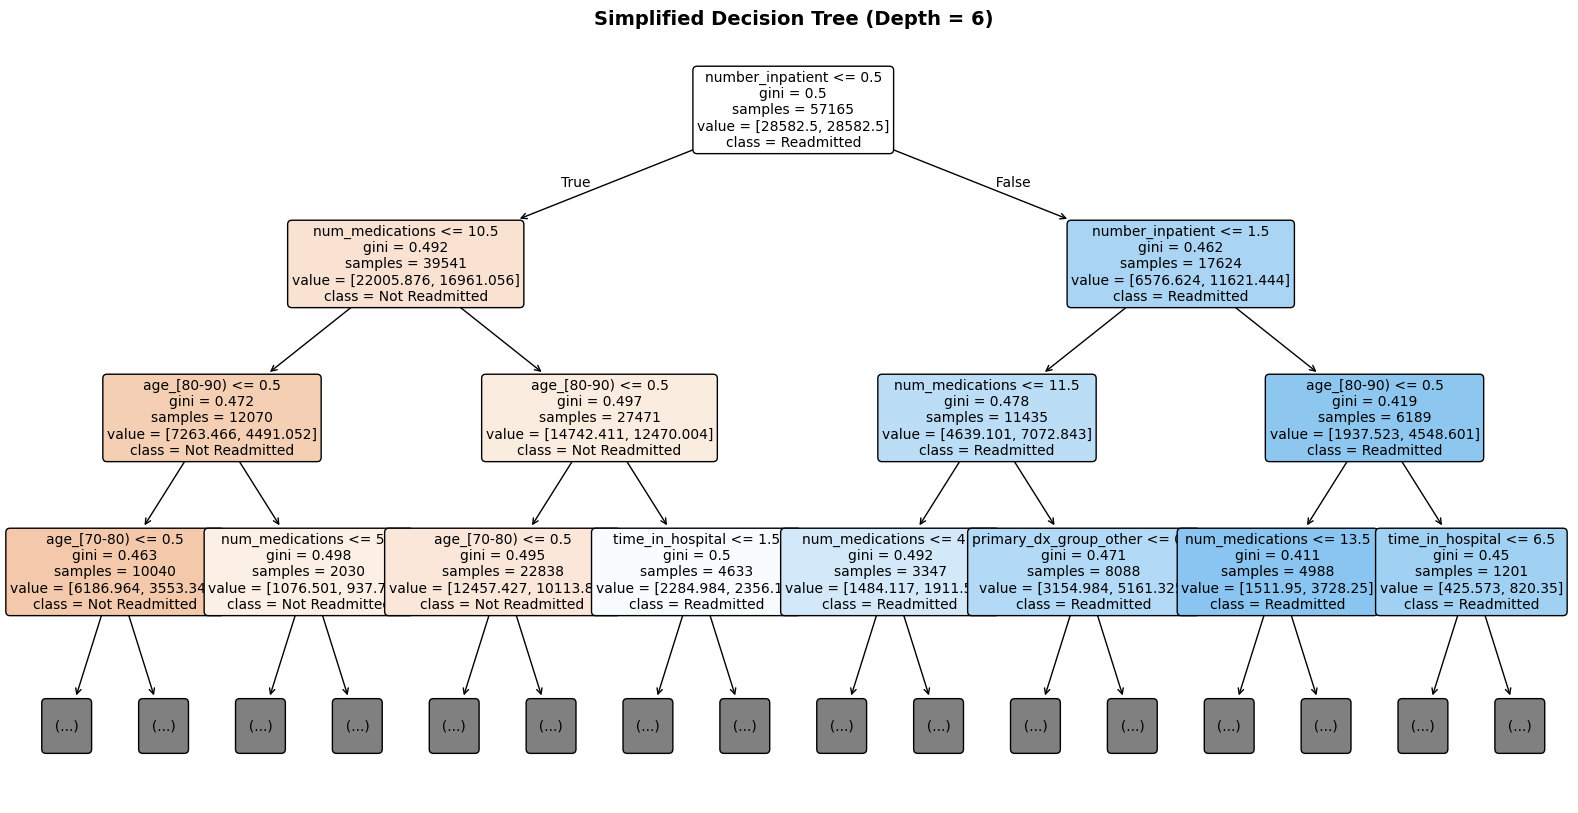

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Limit tree depth (set between 5 and 7)
plot_tree(
    dt_pipe.named_steps['model'],       # or your model name
    feature_names=final_names_dt,       # feature names
    class_names=['Not Readmitted', 'Readmitted'],
    filled=True,
    rounded=True,
    max_depth=3,                        # show only first 3 levels
    fontsize=10
)

plt.title("Simplified Decision Tree (Depth = 6)", fontsize=14, weight='bold')
plt.show()
